In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

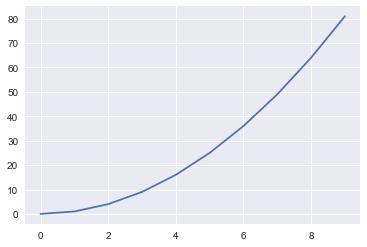

In [6]:
x = np.arange(10)
y = x**2
plt.plot(x, y);   ### need ;

In [7]:
%%timeit
x = range(10000)
a = max(x)

1000 loops, best of 3: 221 µs per loop


In [9]:
%run other.ipynb

from other py cell1
form other py cell2


In [2]:
%run other.py
OtherPy()

from other.py


In [ ]:
# %load other.py
def OtherPy():
    print 'from other.py'


In [13]:
import pandas as pd
step_data = [3620, 7891, 9761, 3907, 4338, 5373]
step_counts = pd.Series(step_data, name='steps')
print step_counts

0    3620
1    7891
2    9761
3    3907
4    4338
5    5373
Name: steps, dtype: int64


In [14]:
step_counts.index = pd.date_range('20150329', periods=6)
print step_counts

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [19]:
# Just like a dictionary
print step_counts['2015-04-01']

# Or by index position-like an array
print step_counts[3]

# Select all of April
print step_counts['2015-04']

3907
3907
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: steps, dtype: int64


In [20]:
print step_counts.dtypes

int64


In [23]:
step_counts = step_counts.astype(np.float)
print step_counts.dtypes
print step_counts

float64
2015-03-29    3620.0
2015-03-30    7891.0
2015-03-31    9761.0
2015-04-01    3907.0
2015-04-02    4338.0
2015-04-03    5373.0
Freq: D, Name: steps, dtype: float64


In [24]:
step_counts[1:3] = np.NaN
print step_counts

2015-03-29    3620.0
2015-03-30       NaN
2015-03-31       NaN
2015-04-01    3907.0
2015-04-02    4338.0
2015-04-03    5373.0
Freq: D, Name: steps, dtype: float64


In [25]:
step_counts = step_counts.fillna(0.)
print step_counts

2015-03-29    3620.0
2015-03-30       0.0
2015-03-31       0.0
2015-04-01    3907.0
2015-04-02    4338.0
2015-04-03    5373.0
Freq: D, Name: steps, dtype: float64


In [26]:
cycling_data = [10.7, 0, None, 2.4, 15.3, 10.9, 0, None]
joined_data = list(zip(step_data, cycling_data))
activity_df = pd.DataFrame(joined_data)
print activity_df

      0     1
0  3620  10.7
1  7891   0.0
2  9761   NaN
3  3907   2.4
4  4338  15.3
5  5373  10.9


In [27]:
activity_df = pd.DataFrame(joined_data,
            index = pd.date_range('20150329', periods=6),
            columns=['Walking', 'Cycling'])
print activity_df

            Walking  Cycling
2015-03-29     3620     10.7
2015-03-30     7891      0.0
2015-03-31     9761      NaN
2015-04-01     3907      2.4
2015-04-02     4338     15.3
2015-04-03     5373     10.9


In [28]:
print activity_df.loc['2015-04-01']

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [29]:
print activity_df.iloc[-3]

Walking    3907.0
Cycling       2.4
Name: 2015-04-01 00:00:00, dtype: float64


In [30]:
print activity_df['Walking']

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [31]:
print activity_df.Walking

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [32]:
# First coloumn
print activity_df.iloc[:,0]

2015-03-29    3620
2015-03-30    7891
2015-03-31    9761
2015-04-01    3907
2015-04-02    4338
2015-04-03    5373
Freq: D, Name: Walking, dtype: int64


In [34]:
filepath = 'data/Iris_Data.csv'
data = pd.read_csv(filepath)
print data.iloc[:5]

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [35]:
data['sepal_area'] = data.sepal_length * data.sepal_width
print data.iloc[:5, -3:]

   petal_width      species  sepal_area
0          0.2  Iris-setosa       17.85
1          0.2  Iris-setosa       14.70
2          0.2  Iris-setosa       15.04
3          0.2  Iris-setosa       14.26
4          0.2  Iris-setosa       18.00


In [41]:
### '()' just for newline
data['abbrev'] = (data.species
                  .apply(lambda x: x.replace('Iris-', '')))
print data.iloc[:5, -3:]

       species  sepal_area  abbrev
0  Iris-setosa       17.85  setosa
1  Iris-setosa       14.70  setosa
2  Iris-setosa       15.04  setosa
3  Iris-setosa       14.26  setosa
4  Iris-setosa       18.00  setosa


In [42]:
small_data = pd.concat([data.iloc[:2], data.iloc[-2:]])
print small_data.iloc[:, -3:]

            species  sepal_area     abbrev
0       Iris-setosa       17.85     setosa
1       Iris-setosa       14.70     setosa
148  Iris-virginica       21.08  virginica
149  Iris-virginica       17.70  virginica


In [45]:
group_sizes = (data.groupby('species').size())
print group_sizes

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [46]:
print data.mean()

sepal_length     5.843333
sepal_width      3.054000
petal_length     3.758667
petal_width      1.198667
sepal_area      17.806533
dtype: float64


In [47]:
print data.petal_length.median()

4.35


In [48]:
print data.petal_length.mode()

0    1.5
dtype: float64


In [50]:
print(data.petal_length.std(),
      data.petal_length.var(),
      data.petal_length.sem())

(1.7644204199522626, 3.113179418344519, 0.1440643240210085)


In [51]:
print data.quantile(0)

sepal_length     4.3
sepal_width      2.0
petal_length     1.0
petal_width      0.1
sepal_area      10.0
Name: 0, dtype: float64


In [52]:
print data.describe()

       sepal_length  sepal_width  petal_length  petal_width  sepal_area
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667   17.806533
std        0.828066     0.433594      1.764420     0.763161    3.368693
min        4.300000     2.000000      1.000000     0.100000   10.000000
25%        5.100000     2.800000      1.600000     0.300000   15.645000
50%        5.800000     3.000000      4.350000     1.300000   17.660000
75%        6.400000     3.300000      5.100000     1.800000   20.325000
max        7.900000     4.400000      6.900000     2.500000   30.020000


In [55]:
sample = (data.sample(n=5, replace=False,
                     random_state=42))
print sample.iloc[:, -3:]

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


In [56]:
sample = (data.sample(n=5, replace=False,
                     random_state=42))
print sample.iloc[:, -3:]

             species  sepal_area      abbrev
73   Iris-versicolor       17.08  versicolor
18       Iris-setosa       21.66      setosa
118   Iris-virginica       20.02   virginica
78   Iris-versicolor       17.40  versicolor
76   Iris-versicolor       19.04  versicolor


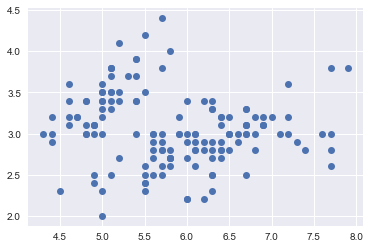

In [58]:
# import matplotlib.pyplot as plt
plt.plot(data.sepal_length, data.sepal_width, ls='', marker='o');

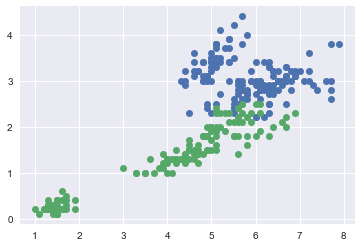

In [59]:
plt.plot(data.sepal_length, data.sepal_width, 
         ls='', marker='o', label='sepal');
plt.plot(data.petal_length, data.petal_width,
         ls='', marker='o', label='petal');

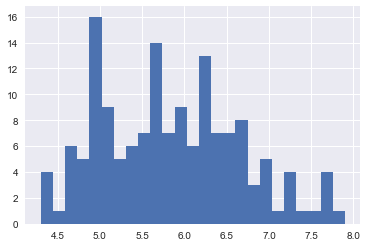

In [61]:
plt.hist(data.sepal_length, bins=25);

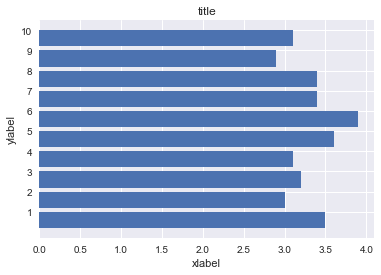

In [62]:
fig, ax = plt.subplots()

ax.barh(np.arange(10), data.sepal_width.iloc[:10]);

ax.set_yticks(np.arange(0.4, 10.4, 1.0));
ax.set_yticklabels(np.arange(1,11));
ax.set(xlabel='xlabel', ylabel='ylabel', title='title');

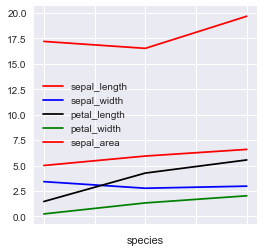

In [64]:
(data.groupby('species')
    .mean()
    .plot(color=['red', 'blue', 'black', 'green'],
         fontsize=10.0, figsize=(4,4)));

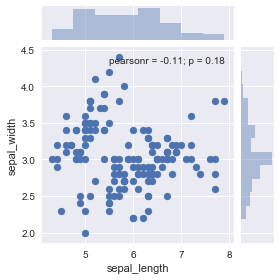

In [66]:
sns.jointplot(x='sepal_length', y='sepal_width', data=data, size=4);

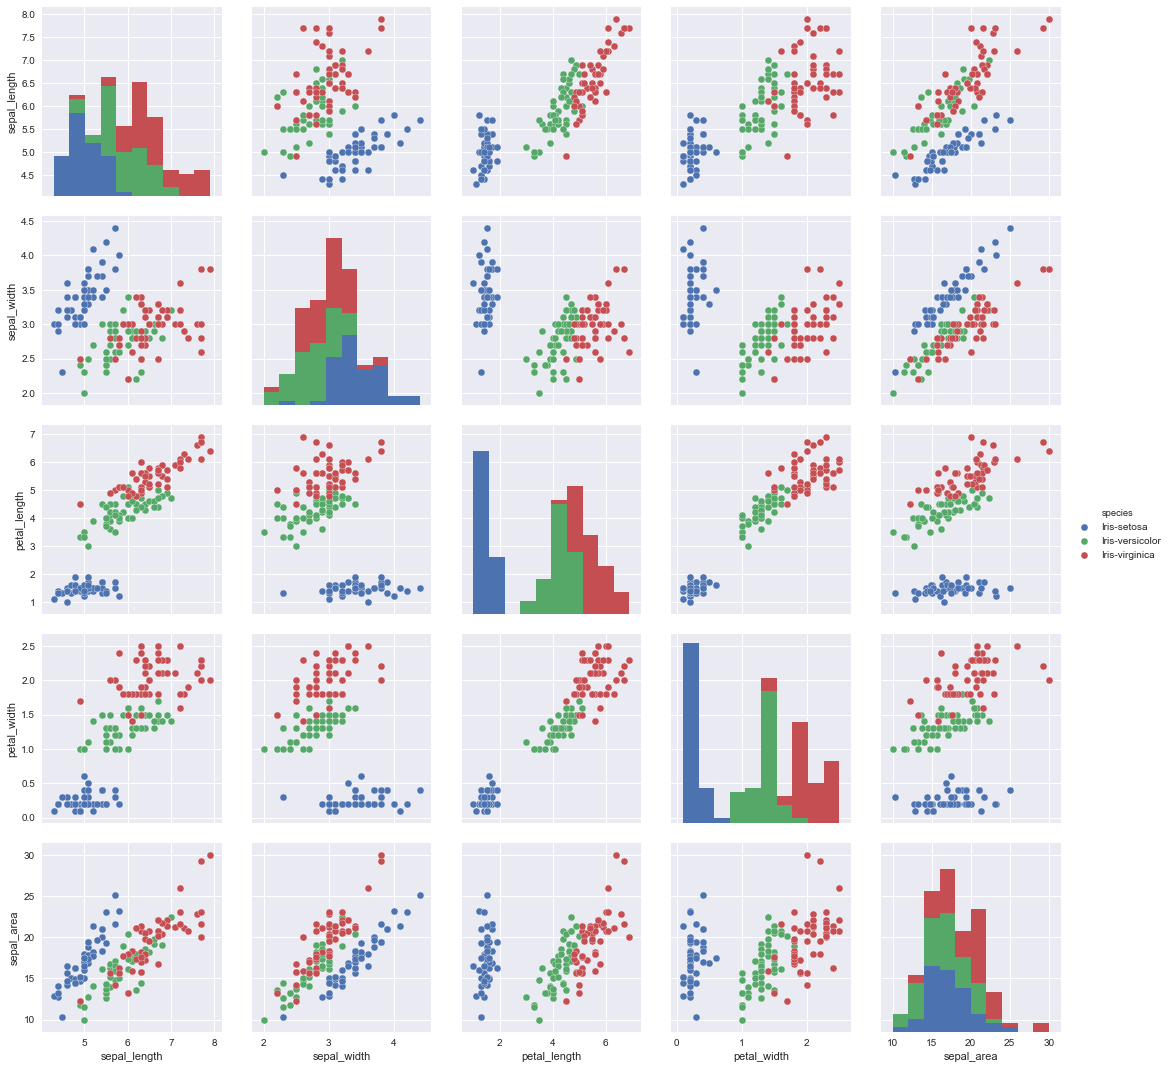

In [67]:
sns.pairplot(data, hue='species', size=3);